# Setup

In [ ]:
%pip install pyshark
%pip install nest_asyncio
%pip install pandas

In [1]:
import pandas as pd
import nest_asyncio
nest_asyncio.apply()

In [2]:
from src.visualization.visualization import Visualization
from src.preprocessors.pcap_preprocessor import PcapPreprocessor

preprocessor = PcapPreprocessor()
visualization = Visualization()

Run only if you have new datasets to upload

In [ ]:
# dataset_files = [('data/2024-10-23-Redline-Stealer-infection-traffic.pcap','unknown')]
# dataset_files = [('data/normal_1.pcap','allow'), ('data/injection_normal1', 'deny')]
dataset_files = [('data/injection_normal1.pcap','deny')]


base_data = preprocessor.load_datasets(dataset_files)

Run only if you have new datasets to upload

In [ ]:
# preprocessor.get_correct_column_type(base_data)
preprocessor.preprocess_dataframe(base_data)

# Visualization

In [3]:
bd_data = preprocessor.get_all_data(sample_size=50000)

##### Get geral information

In [ ]:
print(bd_data.info())

##### Get Column information

In [ ]:
visualization.column_info(bd_data)

##### Get first n rows

In [ ]:
visualization.first_x_rows(bd_data, 5)

##### Clean the data - missing values

In [6]:
base_data_cleaned = visualization.filter_columns_by_missing_values(bd_data, 0.85)

Columns with 0% Missing Values: ['_id', 'dataset', 'label']
Columns with >85% Missing Values: ['icmp.type', 'icmp.code', 'icmp.checksum', 'icmp.checksum_status', 'icmp.ident', 'icmp.ident_le', 'icmp.seq', 'icmp.seq_le', 'icmp.resp_to', 'icmp.resptime', 'icmp.data', 'icmp.data_data', 'icmp.data_len', 'sll.trailer', 'sll.eth_padding', 'udp.srcport', 'udp.dstport', 'udp.port', 'udp.length', 'udp.checksum', 'udp.checksum_status', 'udp.stream', 'udp.', 'udp.time_relative', 'udp.time_delta', 'udp.payload', 'ip._ws_expert', 'ip.ttl_lncb', 'ip._ws_expert_message', 'ip._ws_expert_severity', 'ip._ws_expert_group', 'mdns.dns_id', 'mdns._ws_expert', 'mdns.dns_retransmit_response', 'mdns._ws_expert_message', 'mdns._ws_expert_severity', 'mdns._ws_expert_group', 'mdns.dns_flags', 'mdns.dns_flags_response', 'mdns.dns_flags_opcode', 'mdns.dns_flags_authoritative', 'mdns.dns_flags_truncated', 'mdns.dns_flags_recdesired', 'mdns.dns_flags_recavail', 'mdns.dns_flags_z', 'mdns.dns_flags_authenticated', 'mdn

Column,Missing Percentage
sll.pkttype,0.420
sll.hatype,0.420
sll.halen,0.420
sll.src_eth,0.420
sll.unused,0.420
sll.etype,43.158
ip.version,46.446
ip.hdr_len,46.478
ip.dsfield,46.478
ip.dsfield_dscp,46.478


##### View missing values heatmap

/home/ritavaz02/Documents/uni/5ano/pi-2425/src/visualization/visualization.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data.replace("", np.nan, inplace=True)
/home/ritavaz02/Documents/uni/5ano/pi-2425/src/visualization/visualization.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data.replace("null", np.nan, inplace=True)


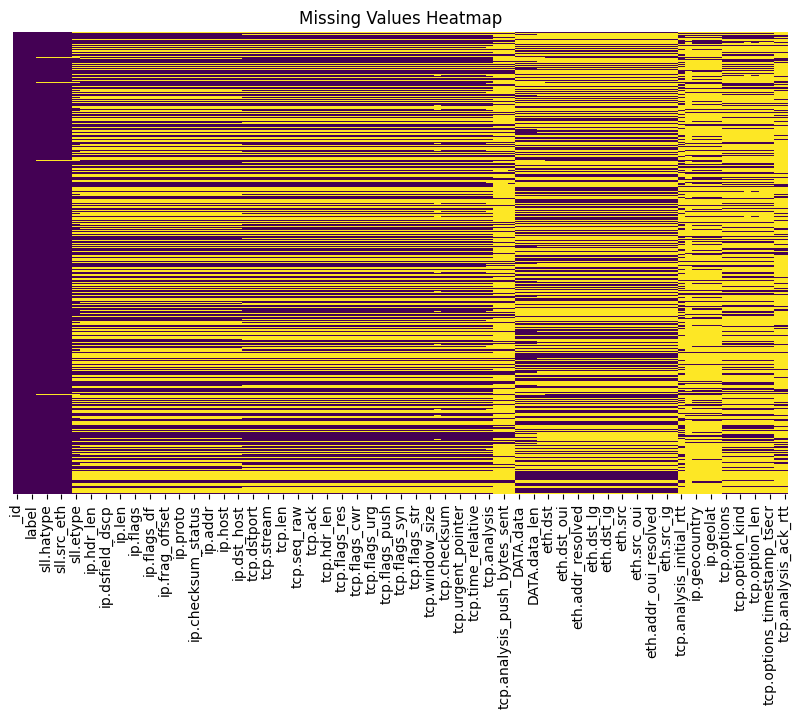

In [7]:
visualization.plot_missing_values_heatmap(base_data_cleaned)

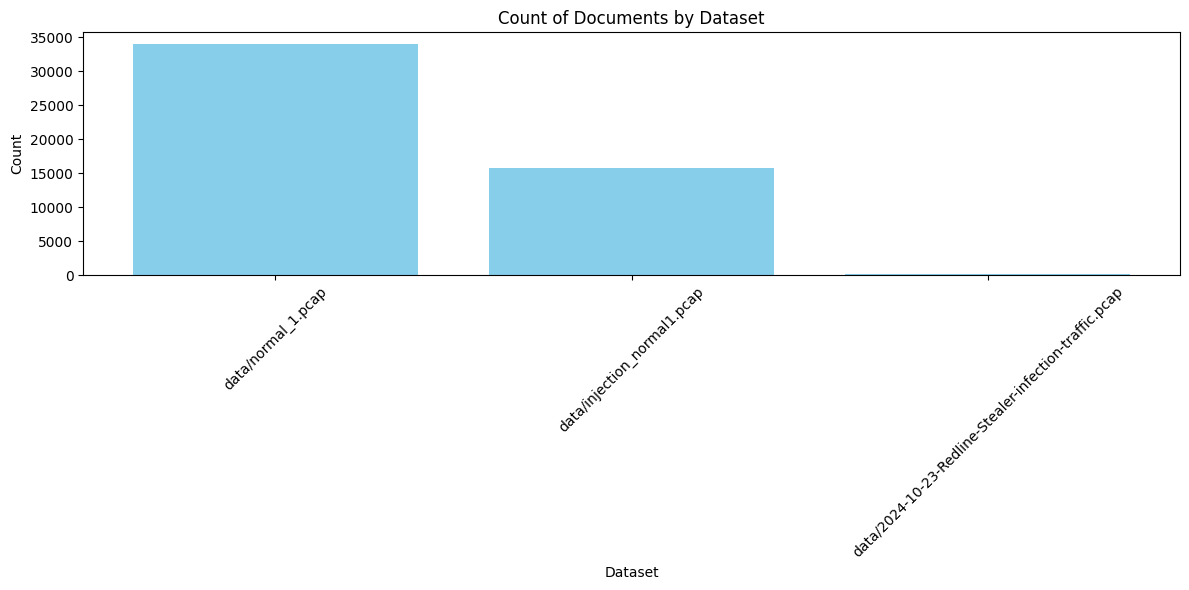

In [8]:
visualization.plot_dataset_counts(bd_data)

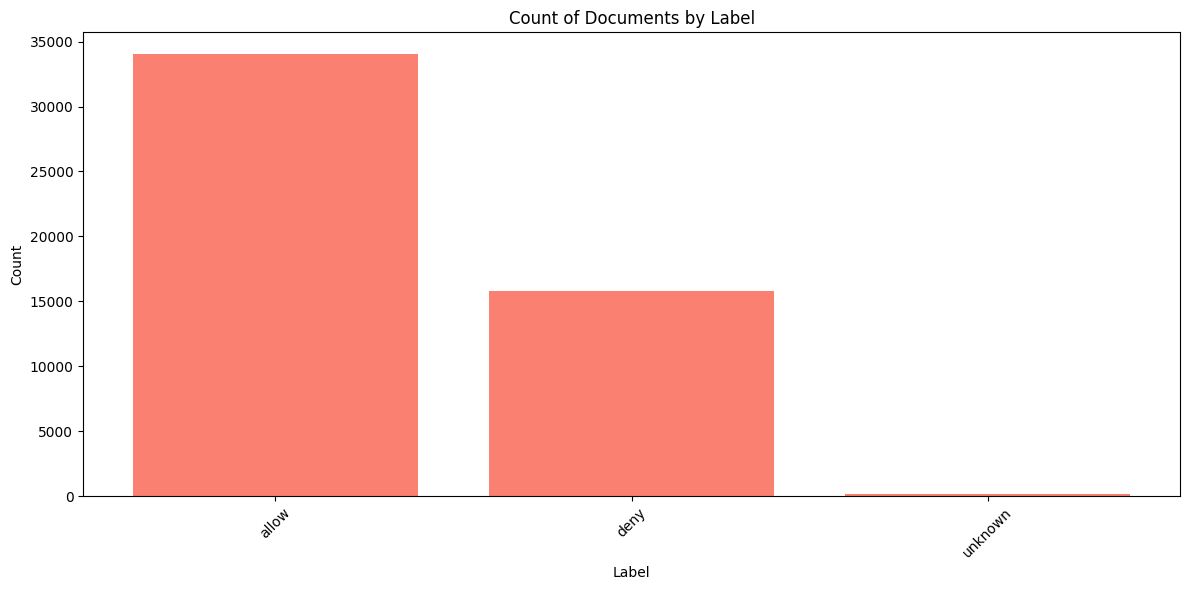

In [9]:
visualization.plot_label_counts(bd_data)

In [ ]:
visualization.plot_tcp_source_ports(bd_data)

In [ ]:
visualization.plot_udp_source_ports(base_data)

In [ ]:
visualization.plot_top_ip_addresses(base_data)

In [ ]:
visualization.plot_top_ip_dest_addresses(base_data)

In [ ]:
visualization.plot_tcp_flags_distribution(base_data)

In [ ]:
visualization.plot_dns_queries(base_data)

In [ ]:
visualization.plot_correlation_matrix(bd_data)

In [ ]:
visualization.plot_tcp_stream_time_series(base_data)

In [ ]:
visualization.plot_distribution(base_data)